In [8]:
import random
from collections import deque

class Replay_Memory():

    def __init__(self, memory_size=50000, burn_in=10000):

        # The memory essentially stores transitions recorder from the agent
        # taking actions in the environment.

        # Burn in episodes define the number of episodes that are written into the memory from the 
        # randomly initialized agent. Memory size is the maximum size after which old elements in 
        # the memory are replaced. A simple (if not the most efficient) was to implement the memory 
        # is as a list of transitions.
        self.memory_size = memory_size
        self.burn_in = burn_in
        self.memory = deque(maxlen=self.memory_size)

    def sample_batch(self, batch_size=32):
        # This function returns a batch of randomly sampled transitions - i.e. state, action, reward, 
        # next state, terminal flag tuples. You will feed this to your model to train.
        return random.sample(self.memory, batch_size)

    def append(self, transition):
        # Appends transition to the memory.
        self.memory.append(transition)

In [9]:
from collections import namedtuple
transition = namedtuple('transition', ('state', 'action', 'reward', 
                                                    'next_state', 'is_terminal'))
replay = Replay_Memory()
import gym
env = gym.make('CartPole-v0')
state = env.reset()
while len(replay.memory) < 10000:
    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)
    replay.append(transition(state, action, reward, next_state, done))
    if done:
        state = env.reset()
    else:
        state = next_state
            

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.


In [10]:
trans = replay.sample_batch(32)

In [11]:
batch = transition(*zip(*trans))

In [12]:
trans[0]

transition(state=array([-0.07978582, -0.82440483,  0.16268968,  1.45386708]), action=1, reward=1.0, next_state=array([-0.09627392, -0.63161122,  0.19176702,  1.21611541]), is_terminal=False)

In [13]:
trans[1].next_state

array([ 0.01294037,  0.39687404, -0.05654767, -0.67193795])

In [14]:
torch.cat(batch.state)

NameError: name 'torch' is not defined

In [15]:
import torch

In [16]:
batch.state

(array([-0.07978582, -0.82440483,  0.16268968,  1.45386708]),
 array([ 0.00891862,  0.20108781, -0.04926493, -0.36413689]),
 array([-0.02499048, -0.01995311, -0.05551403, -0.15739703]),
 array([-0.01685082, -0.19667589,  0.02983281,  0.351898  ]),
 array([ 0.00934916,  0.18687678, -0.01682486, -0.33187027]),
 array([ 0.07586877, -0.03237818, -0.0043262 ,  0.08064091]),
 array([ 0.01583237, -0.01187359,  0.01731777, -0.03164083]),
 array([ 0.09540048, -0.0105282 , -0.02370139,  0.22653033]),
 array([-0.08454839,  0.34115911, -0.0289539 , -0.65092658]),
 array([ 0.01033046, -0.16861007, -0.05294044,  0.22351155]),
 array([ 0.03496189,  0.19281606, -0.04012874, -0.31098348]),
 array([ 0.0369481 , -0.60449612, -0.01185533,  0.76383889]),
 array([-0.04231016, -0.02412872, -0.04520782, -0.0405589 ]),
 array([-0.08325136, -0.73584848,  0.02268312,  1.00216009]),
 array([-0.05020406,  0.56107181,  0.02843524, -0.73602655]),
 array([-0.00668751,  0.15402931,  0.03439953, -0.20743315]),
 array([

In [17]:
1-batch.is_terminal[5]

1

In [18]:
torch.FloatTensor(batch.state).gather(1, torch.LongTensor(batch.action).view(32,1))


-0.8244
 0.2011
-0.0250
-0.1967
 0.1869
 0.0759
-0.0119
-0.0105
 0.3412
-0.1686
 0.0350
-0.6045
-0.0241
-0.7358
-0.0502
 0.1540
-0.1306
 0.0500
 0.0710
-0.1948
-0.4244
 0.0601
-0.0230
 0.1889
 0.0591
 0.0916
-0.2212
 1.1626
 0.0372
-0.5415
-0.1775
-0.1363
[torch.FloatTensor of size 32x1]

In [19]:
torch.FloatTensor(batch.state).size()

torch.Size([32, 4])

In [20]:
torch.LongTensor(batch.action).size()

torch.Size([32])

In [21]:
torch.LongTensor(batch.action).view(32,1)


    1
    1
    0
    1
    1
    0
    1
    1
    1
    1
    0
    1
    1
    1
    0
    1
    0
    0
    0
    1
    1
    0
    0
    1
    1
    0
    1
    1
    0
    1
    1
    0
[torch.LongTensor of size 32x1]

In [22]:
transition = namedtuple('transition', ('state', 'action', 'next_state', 
                                                    'reward', 'is_terminal'))

In [23]:
trans[0].state

array([-0.07978582, -0.82440483,  0.16268968,  1.45386708])

In [24]:
from collections import defaultdict


In [25]:
a=defaultdict()

In [26]:
a[1]=None

In [27]:
a

defaultdict(None, {1: None})

In [28]:
a= defaultdict(lambda: None)

In [29]:
a[1]

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [1]:
input1 = range(1,1100001)

In [2]:
eps_decay = float(1000000)

In [6]:
eps_start = 0.9
eps_end = 0.05

eps_threshold = [eps_start + (eps_end - eps_start) * min((uc/eps_decay),1) for uc in input1]

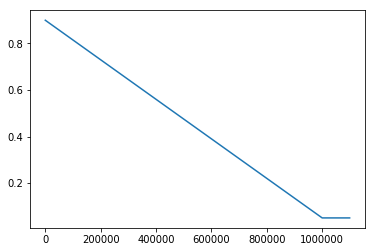

In [7]:
plt.plot(input1, eps_threshold)

In [14]:
import math
eps_threshold = [eps_end + (eps_start - eps_end) * math.exp(-1.*uc*10/eps_decay) for uc in input1]

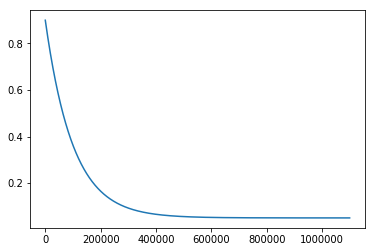

In [15]:
plt.plot(input1, eps_threshold)

In [17]:
eps_threshold[-1]

0.05001419644567171

In [38]:
import math
eps_threshold = [eps_start + (eps_end - eps_start) * math.log(1 + math.exp(1)*min(uc/eps_decay,1))  for uc in input1]

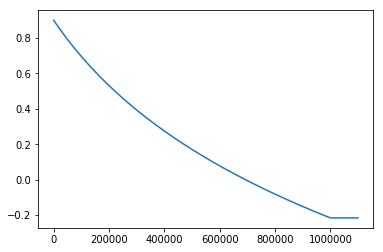

In [39]:
plt.plot(input1, eps_threshold)

In [40]:
math.exp(1)

2.718281828459045

In [41]:
class A():
    def __init__(self):
        self.count =0
    def pr(self):
        print (self.count+3)

class B(A):
    def __init__(self):
        self.count =3
    def pr(self):
        print (self.count+5)

In [42]:
w=B()

In [43]:
w.pr()

8


In [52]:
import gym
import cv2

In [53]:
%matplotlib inline

In [54]:
import matplotlib.pyplot as plt

In [55]:
env = gym.make('SpaceInvaders-v0')

In [56]:
env.observation_space

Box(210, 160, 3)

In [57]:
img = env.reset()

In [58]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [59]:
gray.shape

(210, 160)

In [60]:
gray = cv2.resize(gray,(84, 110))

In [61]:
gray.shape

(110, 84)

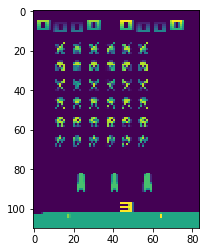

In [62]:
plt.imshow(gray)

In [63]:
gray.shape

(110, 84)

In [66]:
import numpy as np
np.array([gray]*4).shape

(4, 110, 84)

In [67]:
import torch

In [68]:
a=np.array([gray]*4)

In [70]:
np.concat(a[1:],a[0]).shape

(3, 110, 84)

In [71]:
a[0].shape

(110, 84)

In [74]:
np.concatenate()

TypeError: only integer scalar arrays can be converted to a scalar index

In [81]:
c=a[1:]

(1, 110, 84)

In [77]:
b= a[0]

In [79]:
b=b.reshape((1,b.shape[0],b.shape[1]))

In [80]:
b.shape

(1, 110, 84)

In [82]:
c.shape

(3, 110, 84)

In [84]:
type(c)

numpy.ndarray

In [85]:
type(b)

numpy.ndarray

IndexError: index 3 is out of bounds for axis 0 with size 3

In [87]:
a.shape

(4, 110, 84)

In [89]:
a[:3] = c

In [91]:
a[3] = b

In [92]:
a=np.array([1,2,3])

In [93]:
b=a

In [94]:
a[0]=7

In [95]:
b[0]

7

In [96]:
b = np.copy(a)

In [97]:
a[1]=9

In [98]:
b[1]

2

In [99]:
a=np.array([1,2,3])

In [103]:
b= np.zeros((4))

In [104]:
a.shape

(3,)

In [105]:
b.shape

(4,)

In [106]:
b[2:] = a[1:]

In [107]:
b

array([0., 0., 2., 3.])

In [108]:
a[2]=7

In [109]:
b

array([0., 0., 2., 3.])

In [110]:
import torch
from torch.autograd import Variable

env2=gym.make('CartPole-v0')

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.


In [120]:
cur_state1 = env2.reset()
cur_state2 = env.reset()
cur_state2 = cur_state2.transpose(2,0,1)

In [121]:
torch.FloatTensor(cur_state1.view(1)).shape

torch.Size([4])

In [128]:
torch.FloatTensor(cur_state2).unsqueeze(0).shape

torch.Size([1, 3, 210, 160])

In [136]:
x = torch.Tensor([[1, 2, 3, 4],[5,6,7,8]])

In [137]:
x.shape

torch.Size([2, 4])

In [140]:
x.max(1)[1]


 3
 3
[torch.LongTensor of size 2]